In [28]:
#importing libraries and loading data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\HP\Desktop\Oasis internship\EDA project1 level1\retail dataset eda\retail_dataset_sales.csv")
df.head(10)

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.
5,199680,2024-06-01,BF1546,Clothing,Male,29,Sydney,Yes,118,100,218,1,218,1,The product had an underwhelming design.
6,130929,2024-03-06,BF1547,Ornaments,Male,32,Memphis,No,32,0,32,3,96,4,Premium quality as usual.
7,164427,2024-04-16,BF1547,Ornaments,Male,26,Miami,No,32,0,32,2,64,3,Not as expected.
8,149510,2024-05-22,BF1545,Other,Female,26,New York,No,10,0,10,1,10,4,Lack of delivery delays is greatly appreciated.
9,176280,2024-02-27,BF1548,Clothing,Male,20,Sydney,Yes,65,100,165,1,165,4,Great design is one of the major positives of ...


In [4]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   object
dtypes: i

In [6]:
#making sure that the order date is in proper format
df['Order Date']=pd.to_datetime(df['Order Date'])

In [8]:
#print columns if null
print(df.isnull().sum())

Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64


In [9]:
#drop any missing values
df=df.dropna()

In [10]:
#describe the data
print(df.describe())

            Order ID                     Order Date    Buyer Age  Sales Price  \
count    7394.000000                           7394  7394.000000  7394.000000   
mean   159735.134028  2024-05-02 16:09:05.307005696    26.455504    55.165404   
min    120005.000000            2023-11-05 00:00:00    18.000000     9.000000   
25%    139895.750000            2024-02-02 00:00:00    22.000000    15.000000   
50%    159577.500000            2024-04-30 00:00:00    26.000000    65.000000   
75%    179869.750000            2024-07-31 00:00:00    31.000000    97.000000   
max    199994.000000            2024-11-04 00:00:00    35.000000   130.000000   
std     23040.247194                            NaN     5.208202    39.575614   

       Shipping Charges  Sales per Unit     Quantity  Total Sales       Rating  
count       7394.000000     7394.000000  7394.000000  7394.000000  7394.000000  
mean          14.633487       69.798891     1.668109   115.832026     3.499053  
min            0.000000    

In [13]:
#statistical analysis : Calculating man,median,mode and standard deviation
print("Mean:\n",df.mean(numeric_only=True))
print("Median:\n",df.median(numeric_only=True))
print("Mode:\n",df.mode(numeric_only=True))
print("Standard Deviation:\n",df.std(numeric_only=True))

Mean:
 Order ID            159735.134028
Buyer Age               26.455504
Sales Price             55.165404
Shipping Charges        14.633487
Sales per Unit          69.798891
Quantity                 1.668109
Total Sales            115.832026
Rating                   3.499053
dtype: float64
Median:
 Order ID            159577.5
Buyer Age               26.0
Sales Price             65.0
Shipping Charges         0.0
Sales per Unit          65.0
Quantity                 1.0
Total Sales             90.0
Rating                   4.0
dtype: float64
Mode:
       Order ID  Buyer Age  Sales Price  Shipping Charges  Sales per Unit  \
0       120005       34.0         65.0               0.0            65.0   
1       120024        NaN          NaN               NaN             NaN   
2       120040        NaN          NaN               NaN             NaN   
3       120042        NaN          NaN               NaN             NaN   
4       120046        NaN          NaN               NaN       

In [18]:
#grouping  order date and total sales as daily sale
daily_sale=df.groupby('Order Date')['Total Sales'].sum()

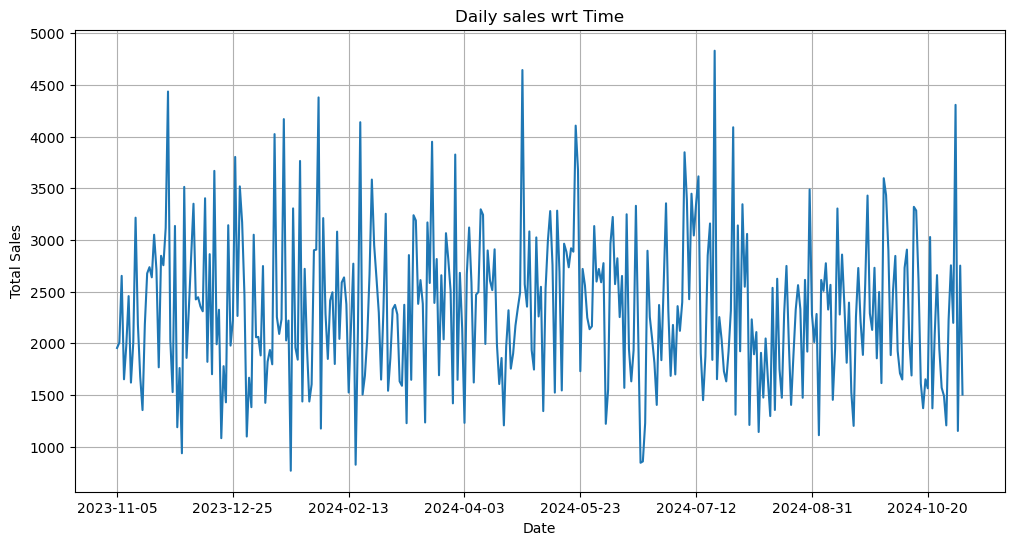

In [20]:
#visualizing daily sales wwith matplotlib
plt.figure(figsize=(12,6))
daily_sale.plot()
plt.title("Daily sales wrt Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

<Axes: title={'center': 'Buyer Age Distribution'}, ylabel='Frequency'>

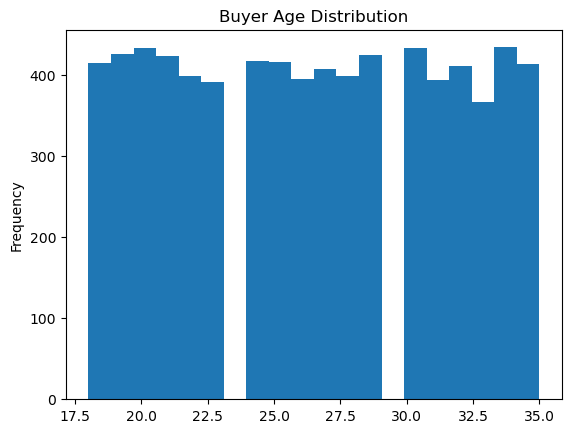

In [23]:
#buyer age data as per histogram
df['Buyer Age'].plot(kind='hist',bins=20,title='Buyer Age Distribution')

<Axes: title={'center': 'Buyer Gender Count'}, xlabel='Buyer Gender'>

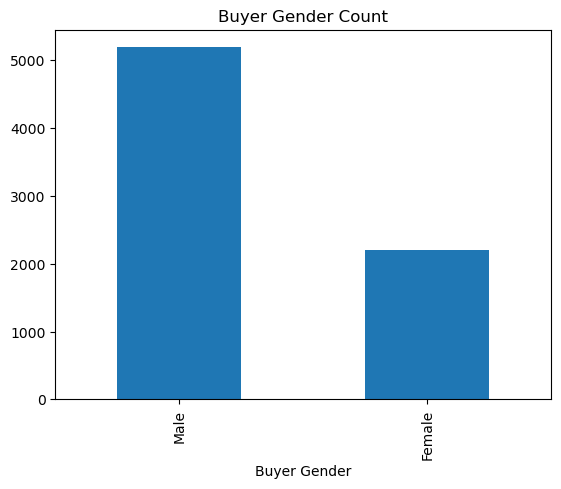

In [25]:
#buyer gender data in barchart 
df['Buyer Gender'].value_counts().plot(kind='bar', title="Buyer Gender Count")

<Axes: title={'center': 'Top Selling Categories'}, xlabel='Product Category'>

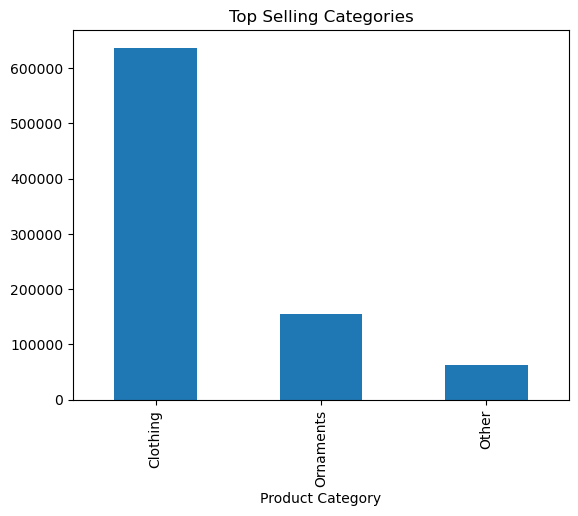

In [26]:
#grouping product category & Total sales as top categories and visualising as barchart
top_categories = df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', title='Top Selling Categories')

<Axes: title={'center': 'Top 10 Products by Quantity Sold'}, xlabel='Product ID'>

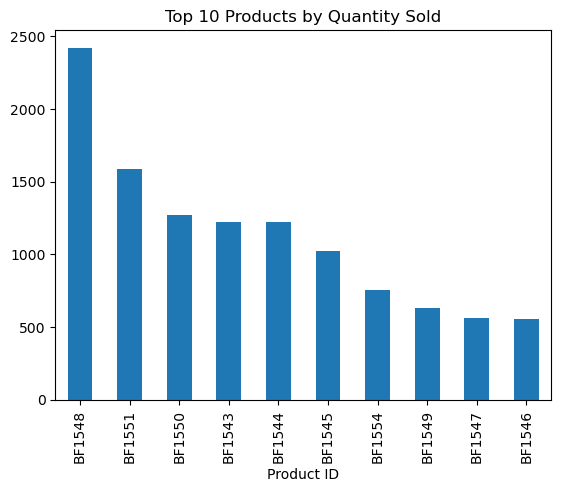

In [27]:
#grouping product id & uantity as top products and visualizing as barchart
top_products = df.groupby('Product ID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold')

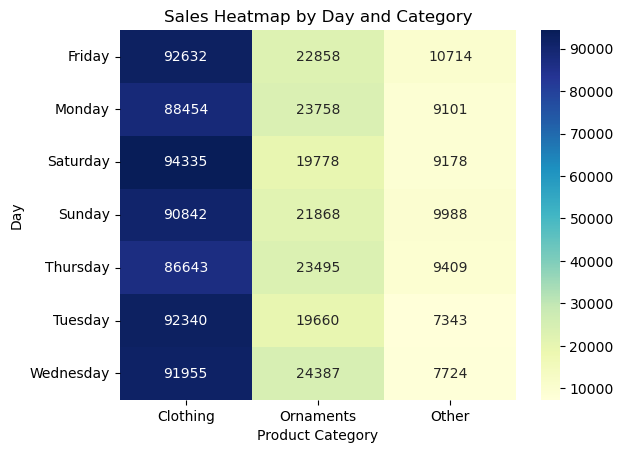

In [31]:
# First convert the 'Order Date' column to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Now you can use the .dt accessor
df['Day'] = df['Order Date'].dt.day_name()
pivot = df.pivot_table(index='Day', columns='Product Category', values='Total Sales', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title("Sales Heatmap by Day and Category")
plt.show()

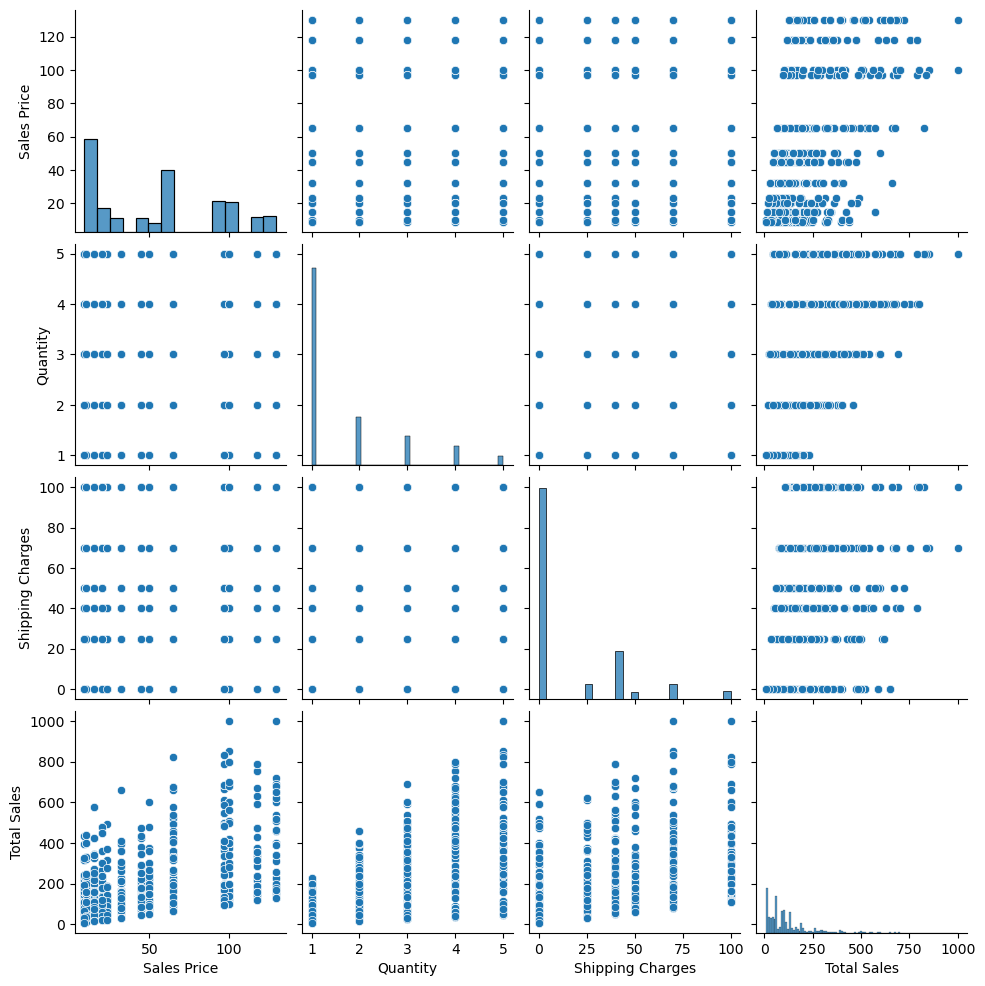

In [29]:
#visualization through seaborn lib
sns.pairplot(df[['Sales Price', 'Quantity', 'Shipping Charges', 'Total Sales']])